## Example: White Noise Process

In this example, a white noise process is often defined by its spectral properties, but here we will start by defining it using its _autocorrelation function_. 

Consider a zero-mean complex white noise process $Z(t)$, which has an autocorrelation function given by:

$$
R_{Z}(\tau) = \mathbb{E}\{Z^*(t)Z(t+\tau)\} = 2N_0\delta(\tau)
$$

where:
- $N_0$ is a constant representing the noise power spectral density.
- For any finite and continuous signal $s(t)$, $\delta(\tau)$ is the Dirac delta function, defined by the integral property:

$$
\int_{-\infty}^{\infty} s(t)\delta(t-t_0) \, dt = s(t_0)
$$

The term "white" indicates that the process has a constant power spectral density across all frequencies, analogous to white light containing all colors.

In theory, no finite energy process can be perfectly white, as such a process would require infinite power. However, in practice, many processes can be well-modeled as white noise because their impact on system modeling, design, and performance is indistinguishable from that of an ideal white noise process. For instance, consider a random square-wave process. If this process is an input to a sampled system with sampling intervals much greater than the random square-wave "chip" time $T_c$, then the samples of the output would be statistically independent. 

This statistical independence would make the samples functionally indistinguishable from those of an ideal white noise process, thus allowing the random square-wave process to be treated as a white process in practical scenarios.

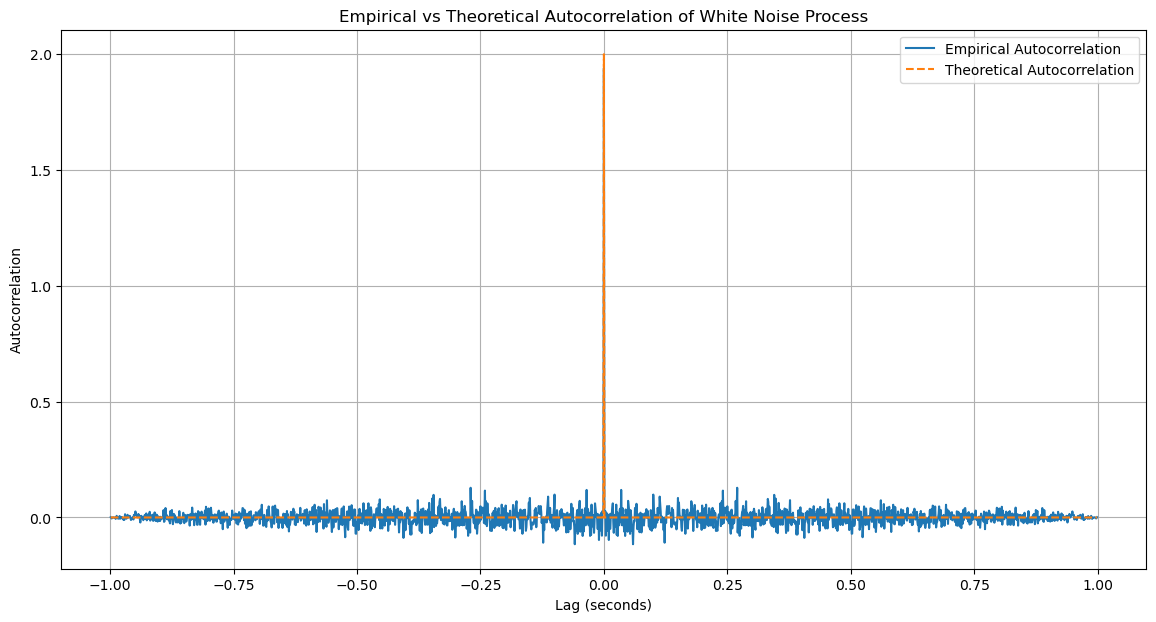

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Parameters
N0 = 1
num_samples = 1000
sampling_rate = 1e3  # 1 kHz
dt = 1 / sampling_rate

# Generate complex white noise process z(t)
real_part = np.sqrt(N0) * np.random.randn(num_samples)
imag_part = np.sqrt(N0) * np.random.randn(num_samples)
z_t = real_part + 1j * imag_part

# Compute empirical autocorrelation
lags = np.arange(-num_samples + 1, num_samples)
autocorr_empirical = np.correlate(z_t, z_t, mode='full') / num_samples

# Theoretical autocorrelation
autocorr_theoretical = 2 * N0 * np.array([1 if tau == 0 else 0 for tau in lags])

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(lags * dt, autocorr_empirical, label='Empirical Autocorrelation')
plt.plot(lags * dt, autocorr_theoretical, label='Theoretical Autocorrelation', linestyle='--')

plt.title('Empirical vs Theoretical Autocorrelation of White Noise Process')
plt.xlabel('Lag (seconds)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.show()


## Power Spectral Density of a White Noise Process

The power spectral density (PSD) of a complex process is defined as:

$$
S_{Z}(f) = \int_{-\infty}^{\infty} R_{Z}(\tau) e^{-j2\pi f \tau} d\tau
$$

For a zero-mean complex white noise process $Z(t)$, with autocorrelation function $R_{Z}(\tau) = 2 N_0 \delta(\tau)$, the PSD is given by:

$$
S_{Z}(f) = \int_{-\infty}^{\infty} 2N_0 \delta(\tau) e^{-j2\pi f \tau} d\tau = 2 N_0, \quad \forall f
$$

This result indicates that the process has a constant power spectral density across all frequencies, which is a characteristic feature of white noise. However, such a process would theoretically require infinite power, making it physically impossible.

In practice, white noise is an idealized concept used to approximate real processes that have a much wider bandwidth than the system of interest. The actual noise is often bandlimited but is modeled as white noise over the bandwidth of interest. When white noise is filtered through a system with bandwidth $ B $, the resulting finite noise power is given by $ \sigma^2 = 2N_0B $. This represents the noise power within the system's bandwidth, providing a practical measure of noise in real-world applications.

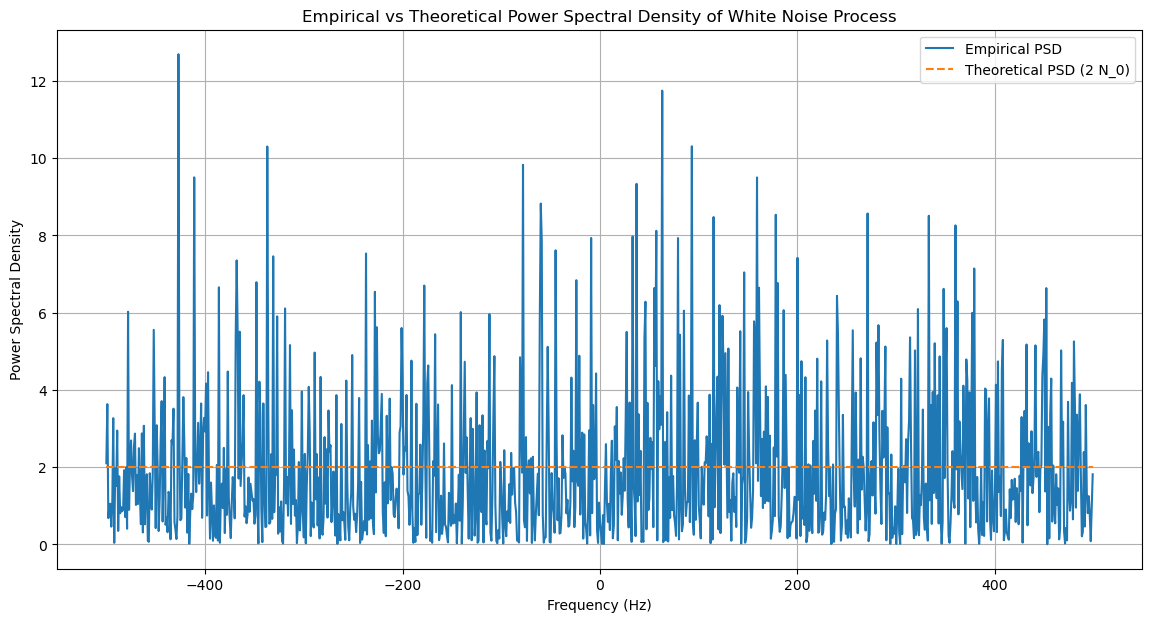

In [2]:
from scipy.fft import fft, fftfreq, fftshift

# Compute empirical Power Spectral Density (PSD) using FFT
Z_f = fft(z_t)
psd_empirical = np.abs(fftshift(Z_f))**2 / num_samples
freqs = fftshift(fftfreq(num_samples, dt))

# Theoretical PSD
psd_theoretical = 2 * N0 * np.ones_like(freqs)

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(freqs, psd_empirical, label='Empirical PSD')
plt.plot(freqs, psd_theoretical, label='Theoretical PSD (2 N_0)', linestyle='--')

plt.title('Empirical vs Theoretical Power Spectral Density of White Noise Process')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.show()
